In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
automobile_data = pd.read_csv('datasets/automobile_data_processed.csv')

automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
308,38.1,4,89.0,60,1968,18.8,40
186,16.0,8,318.0,150,4190,13.0,44
178,25.0,4,121.0,115,2671,13.5,45
27,11.0,8,318.0,210,4382,13.5,50
227,16.0,8,400.0,180,4220,11.1,43


In [3]:
automobile_data.shape

(392, 7)

Text(0.5, 1.0, 'Miles per gallon')

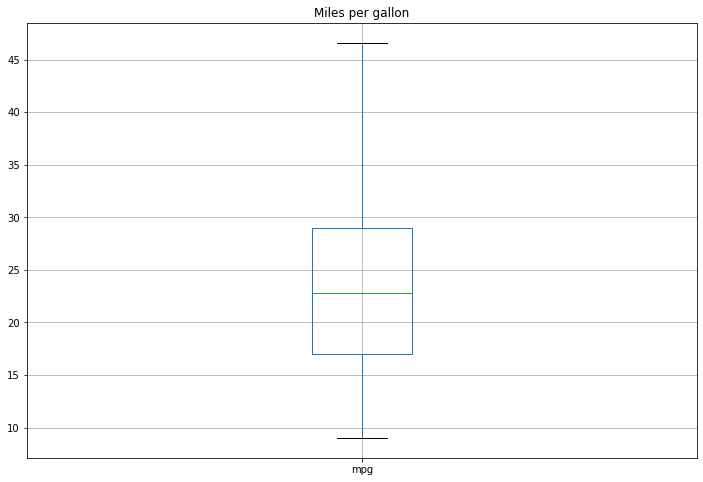

In [4]:
automobile_data.boxplot('mpg', figsize=(12, 8))

plt.title('Miles per gallon')

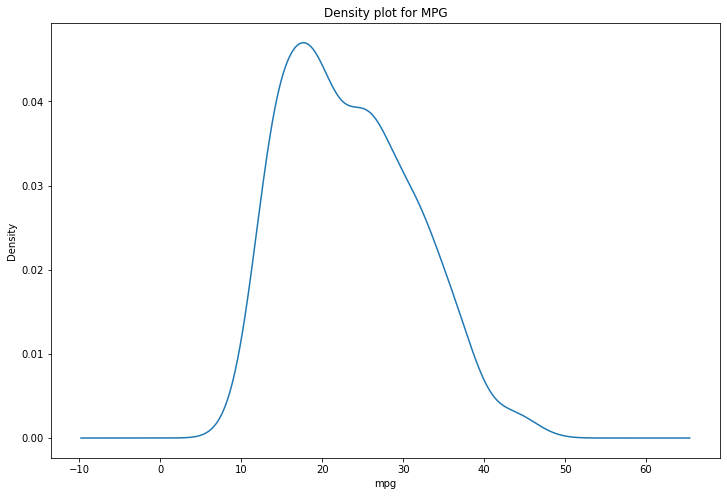

In [5]:
automobile_data['mpg'].plot.kde(figsize=(12, 8))

plt.xlabel('mpg')

plt.title('Density plot for MPG')
plt.show()

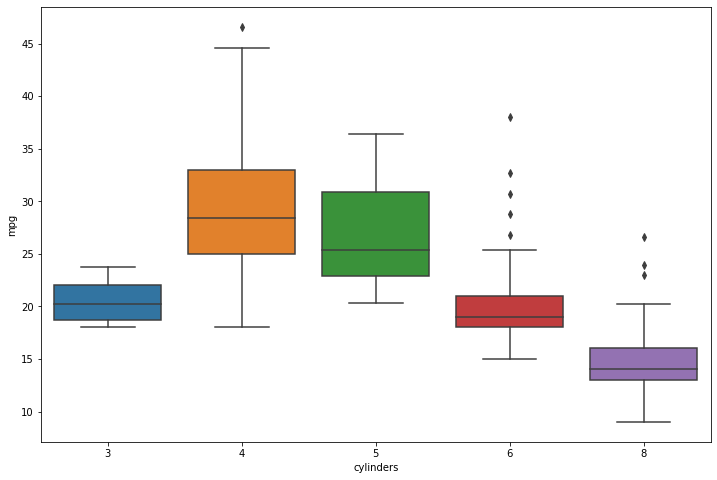

In [6]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='cylinders', y='mpg', data=automobile_data)

plt.show()

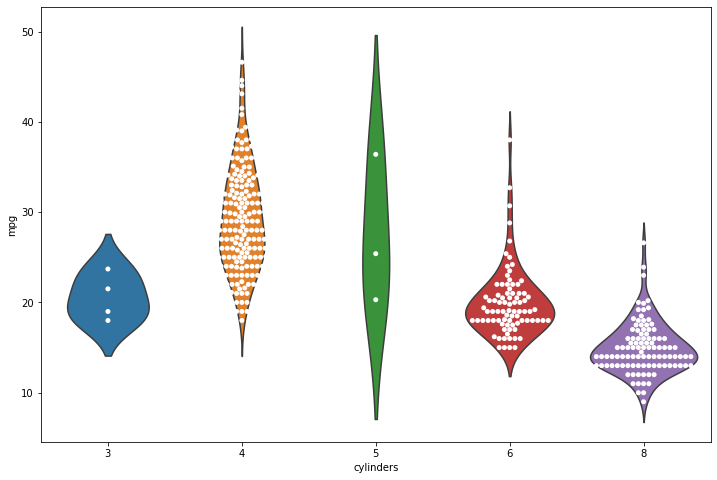

In [7]:
plt.figure(figsize=(12, 8))

sns.violinplot(x='cylinders', y='mpg', data=automobile_data, inner=None)
sns.swarmplot(x='cylinders', y='mpg', data=automobile_data, color='w')

plt.show()

In [8]:
cylinder_stats = automobile_data.groupby(['cylinders'])['mpg'].agg(['mean', 'count', 'std'])

cylinder_stats

,mean,count,std
cylinders,,,
3,20.550000,4,2.564501
4,29.283920,199,5.670546
5,27.366667,3,8.228204
6,19.973494,83,3.828809
8,14.963107,103,2.836284


In [9]:
ci95_high = []

ci95_low = []

In [10]:
for i in cylinder_stats.index:
    
    mean, count, std = cylinder_stats.loc[i]
    
    ci95_high.append(mean + 1.96 * (std / math.sqrt(count)))
    ci95_low.append(mean - 1.96 * (std / math.sqrt(count)))

In [11]:
cylinder_stats['ci95_HIGH'] = ci95_high
cylinder_stats['ci95_LOW'] = ci95_low

cylinder_stats

,mean,count,std,ci95_HIGH,ci95_LOW
cylinders,,,,,
3,20.550000,4,2.564501,23.063211,18.036789
4,29.283920,199,5.670546,30.071789,28.496050
5,27.366667,3,8.228204,36.677755,18.055578
6,19.973494,83,3.828809,20.797216,19.149772
8,14.963107,103,2.836284,15.510863,14.415351


In [12]:
cylinders = 4

cylinders4_df = automobile_data.loc[automobile_data['cylinders'] == cylinders]

cylinders4_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
353,31.6,4,120.0,74,2635,18.3,39
215,30.0,4,111.0,80,2155,14.8,43
139,29.0,4,98.0,83,2219,16.5,46
388,44.0,4,97.0,52,2130,24.6,38
184,27.0,4,101.0,83,2202,15.3,44
19,26.0,4,97.0,46,1835,20.5,50
333,32.4,4,107.0,72,2290,17.0,40
322,40.8,4,85.0,65,2110,19.2,40
52,31.0,4,71.0,65,1773,19.0,49
354,28.1,4,141.0,80,3230,20.4,39


/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


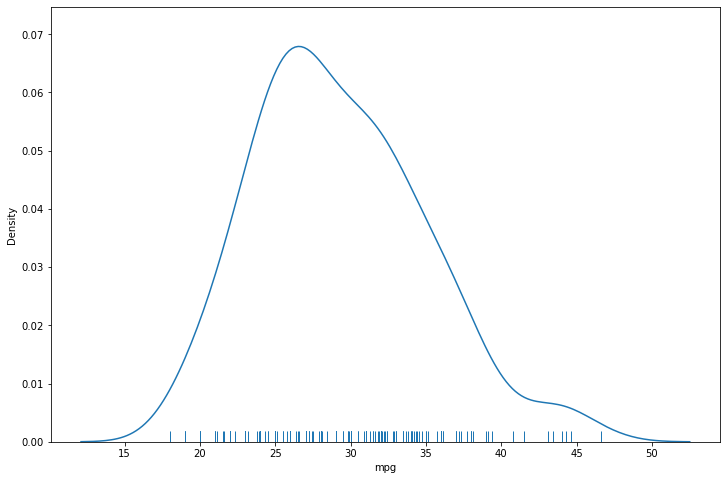

In [13]:
plt.figure(figsize=(12, 8))

sns.distplot(cylinders4_df['mpg'], rug=True, kde=True, hist=False)

plt.show()

/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


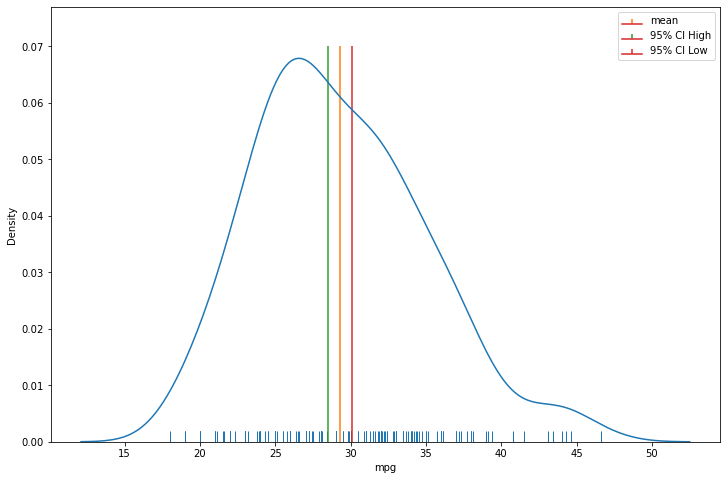

In [14]:
plt.figure(figsize=(12, 8))

sns.distplot(cylinders4_df['mpg'], rug=True, kde=True, hist=False)

plt.stem([cylinder_stats.loc[cylinders]['mean']], 
         [0.07], linefmt = 'C1', 
         markerfmt = 'C1', label = 'mean')

plt.stem([cylinder_stats.loc[cylinders]['ci95_LOW']], 
         [0.07], linefmt = 'C2', 
         markerfmt = 'C2', label = '95% CI High')

plt.stem([cylinder_stats.loc[cylinders]['ci95_HIGH']], 
         [0.07], linefmt = 'C3', 
         markerfmt = 'C3', label = '95% CI Low')

plt.xlabel('mpg')
plt.legend()
plt.show()

In [15]:
cylinders = 6

cylinders6_df = automobile_data.loc[automobile_data['cylinders'] == cylinders]

cylinders6_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
96,18.0,6,225.0,105,3121,16.5,47
275,16.2,6,163.0,133,3410,15.8,42
99,18.0,6,250.0,88,3021,16.5,47
44,18.0,6,258.0,110,2962,13.5,49
32,19.0,6,232.0,100,2634,13.0,49
16,18.0,6,199.0,97,2774,15.5,50
97,16.0,6,250.0,100,3278,18.0,47
132,16.0,6,258.0,110,3632,18.0,46
200,17.5,6,258.0,95,3193,17.8,44
152,15.0,6,250.0,72,3432,21.0,45


/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


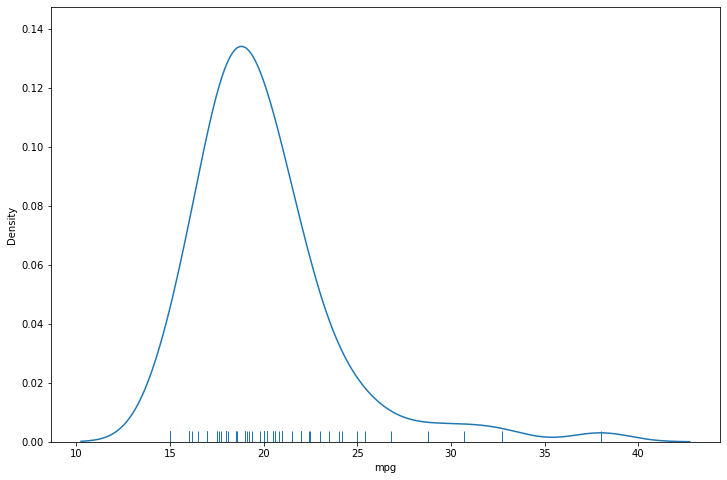

In [16]:
plt.figure(figsize=(12, 8))

sns.distplot(cylinders6_df['mpg'], rug=True, kde=True, hist=False)

plt.show()

/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jubayer/anaconda3/envs/dsn-template/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


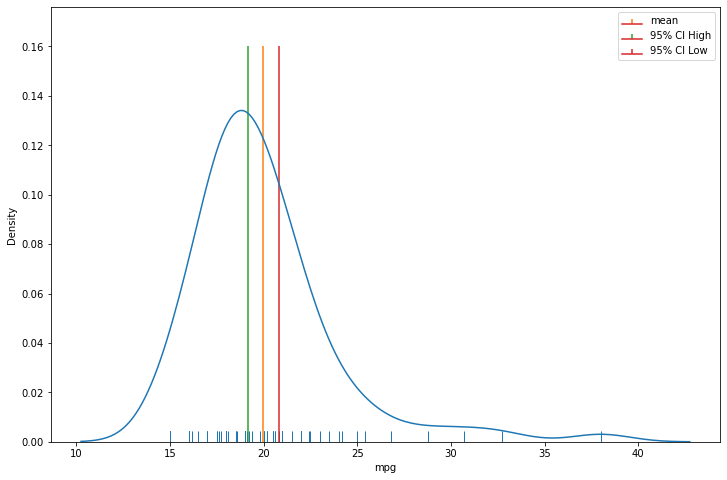

In [17]:
plt.figure(figsize=(12, 8))

sns.distplot(cylinders6_df['mpg'], rug=True, kde=True, hist=False)

plt.stem([cylinder_stats.loc[cylinders]['mean']], 
         [0.16], linefmt = 'C1', 
         markerfmt = 'C1', label = 'mean')

plt.stem([cylinder_stats.loc[cylinders]['ci95_LOW']], 
         [0.16], linefmt = 'C2', 
         markerfmt = 'C2', label = '95% CI High')

plt.stem([cylinder_stats.loc[cylinders]['ci95_HIGH']], 
         [0.16], linefmt = 'C3', 
         markerfmt = 'C3', label = '95% CI Low')

plt.xlabel('mpg')
plt.legend()
plt.show()